In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv("../data/raw/ev_battery_charging.csv")

In [37]:
df.head()

,timestamp,SOC,SOH,terminal_voltage,battery_current,battery_temp,ambient_temp,internal_resistance,action_current,action_voltage,...,dV_dt,soc_delta,thermal_stress_index,aging_indicator,charging_efficiency,charging_time,cycle_degradation,over_temp_flag,over_voltage_flag,balancing_time
0,0,0.059934,0.867421,2.800000,24.306689,30.253841,39.880384,0.089445,24.152161,2.800000,...,0.000000,0.047235,0.000000,0.216028,0.863980,2371,0.000426,0,0,24.933030
1,1,0.107169,0.993388,2.800000,6.888177,30.363472,15.399988,0.108257,8.014256,2.800000,...,0.031064,0.055094,0.374087,0.086760,0.853122,3479,0.000946,0,0,26.837918
2,2,0.170123,0.897095,2.862128,25.689530,32.066534,25.076428,0.133563,25.343965,2.883569,...,0.000000,0.071707,0.174753,0.338501,0.856608,2839,0.000467,0,0,10.002188
3,3,0.250583,0.983261,2.800000,15.691727,32.269852,35.452532,0.076195,12.142471,2.800000,...,-0.031064,0.062889,0.000000,0.092520,0.849252,2725,0.000567,0,0,14.369082
4,4,0.295900,0.940441,2.800000,19.901598,33.003209,10.612048,0.073659,22.703030,2.830187,...,0.000183,0.045317,0.559779,0.167229,0.829716,3584,0.000689,0,0,2.804287


In [38]:
df.columns

Index(['timestamp', 'SOC', 'SOH', 'terminal_voltage', 'battery_current',
       'battery_temp', 'ambient_temp', 'internal_resistance', 'action_current',
       'action_voltage', 'dT_dt', 'dV_dt', 'soc_delta', 'thermal_stress_index',
       'aging_indicator', 'charging_efficiency', 'charging_time',
       'cycle_degradation', 'over_temp_flag', 'over_voltage_flag',
       'balancing_time'],
      dtype='object')

In [39]:
df.columns.tolist()

['timestamp',
 'SOC',
 'SOH',
 'terminal_voltage',
 'battery_current',
 'battery_temp',
 'ambient_temp',
 'internal_resistance',
 'action_current',
 'action_voltage',
 'dT_dt',
 'dV_dt',
 'soc_delta',
 'thermal_stress_index',
 'aging_indicator',
 'charging_efficiency',
 'charging_time',
 'cycle_degradation',
 'over_temp_flag',
 'over_voltage_flag',
 'balancing_time']

In [40]:
df.isnull().sum()

timestamp               0
SOC                     0
SOH                     0
terminal_voltage        0
battery_current         0
battery_temp            0
ambient_temp            0
internal_resistance     0
action_current          0
action_voltage          0
dT_dt                   0
dV_dt                   0
soc_delta               0
thermal_stress_index    0
aging_indicator         0
charging_efficiency     0
charging_time           0
cycle_degradation       0
over_temp_flag          0
over_voltage_flag       0
balancing_time          0
dtype: int64

In [41]:
df.duplicated().sum()

np.int64(0)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             1900 non-null   int64  
 1   SOC                   1900 non-null   float64
 2   SOH                   1900 non-null   float64
 3   terminal_voltage      1900 non-null   float64
 4   battery_current       1900 non-null   float64
 5   battery_temp          1900 non-null   float64
 6   ambient_temp          1900 non-null   float64
 7   internal_resistance   1900 non-null   float64
 8   action_current        1900 non-null   float64
 9   action_voltage        1900 non-null   float64
 10  dT_dt                 1900 non-null   float64
 11  dV_dt                 1900 non-null   float64
 12  soc_delta             1900 non-null   float64
 13  thermal_stress_index  1900 non-null   float64
 14  aging_indicator       1900 non-null   float64
 15  charging_efficiency  

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,1900.0,949.500000,548.627074,0.000000,474.750000,949.500000,1424.250000,1899.000000
SOC,1900.0,48.154233,28.094806,0.059934,23.881046,47.952540,72.432345,96.753910
SOH,1900.0,0.924552,0.043182,0.850002,0.887646,0.924675,0.961590,0.999934
terminal_voltage,1900.0,3.473539,0.394720,2.800000,3.131540,3.470022,3.810061,4.200000
battery_current,1900.0,17.186868,7.186367,5.006025,10.973488,16.926272,23.251138,29.980182
battery_temp,1900.0,581.868816,311.917184,30.253841,315.303105,579.829927,851.818235,1129.491070
ambient_temp,1900.0,24.809350,8.472867,10.001585,17.604701,24.833801,31.956746,39.985156
internal_resistance,1900.0,0.085849,0.037897,0.020021,0.053180,0.085722,0.119286,0.149958
action_current,1900.0,17.133618,7.806316,0.000000,10.938281,16.947561,23.326322,35.000000
action_voltage,1900.0,3.474594,0.397229,2.800000,3.134212,3.473040,3.821057,4.200000


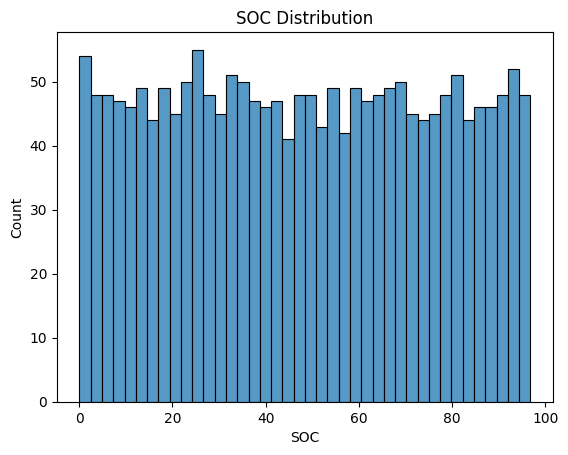

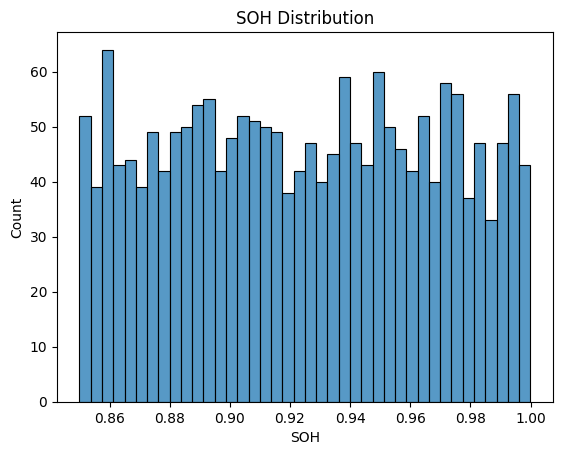

In [44]:
sns.histplot(df['SOC'], bins=40)
plt.title("SOC Distribution")
plt.show()

sns.histplot(df['SOH'], bins=40)
plt.title("SOH Distribution")
plt.show()

In [45]:
df = df.drop_duplicates()
df = df.fillna(method="ffill").fillna(method="bfill")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18524\2034178172.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill").fillna(method="bfill")


In [46]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek

In [47]:
MODEL_FEATURES = [
    'terminal_voltage', 'battery_current', 'battery_temp',
    'ambient_temp', 'internal_resistance',
    'action_current', 'action_voltage',
    'dT_dt', 'dV_dt', 'soc_delta',
    'thermal_stress_index', 'aging_indicator',
    'charging_efficiency', 'charging_time',
    'cycle_degradation',
    'over_temp_flag', 'over_voltage_flag',
    'balancing_time',
    'hour', 'dayofweek'
]

TARGET_SOC = 'SOC'
TARGET_SOH = 'SOH'

In [48]:
X = df[MODEL_FEATURES]
y_soc = df[TARGET_SOC]
y_soh = df[TARGET_SOH]

X.shape, y_soc.shape, y_soh.shape

((1900, 20), (1900,), (1900,))

In [49]:
df.to_csv(("../data/processed/cleaned_telemetry.csv"), index=False)
X.to_csv("../data/feature_store/model_features.csv", index=False)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import joblib

In [51]:
X_train, X_test, y_soc_train, y_soc_test = train_test_split(
    X, y_soc, test_size=0.2, random_state=42
)

_, _, y_soh_train, y_soh_test = train_test_split(
    X, y_soh, test_size=0.2, random_state=42
)

In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
soc_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
soc_model.fit(X_train_scaled, y_soc_train)

pred_soc = soc_model.predict(X_test_scaled)
print("SOC MAE:", mean_absolute_error(y_soc_test, pred_soc))

SOC MAE: 0.07199441847801669


In [54]:
soh_model = LinearRegression()
soh_model.fit(X_train_scaled, y_soh_train)

pred_soh = soh_model.predict(X_test_scaled)
print("SOH MAE:", mean_absolute_error(y_soh_test, pred_soh))

SOH MAE: 0.03964312967556492


In [55]:
import os
import joblib

# Ensure the directory exists
os.makedirs("ml/models", exist_ok=True)

# Save models and scaler
joblib.dump(soc_model, "ml/models/trip_feasibility.pkl")
joblib.dump(soh_model, "ml/models/soh_forecast.pkl")
joblib.dump(scaler, "ml/models/scaler.pkl")

print("✅ Models and scaler saved successfully.")

✅ Models and scaler saved successfully.


In [56]:
sample = {
    'terminal_voltage': 620,
    'battery_current': 120,
    'battery_temp': 34,
    'ambient_temp': 30,
    'internal_resistance': 0.045,
    'action_current': 110,
    'action_voltage': 600,
    'dT_dt': 0.03,
    'dV_dt': -0.02,
    'soc_delta': -0.4,
    'thermal_stress_index': 0.6,
    'aging_indicator': 0.25,
    'charging_efficiency': 0.92,
    'charging_time': 45,
    'cycle_degradation': 0.003,
    'over_temp_flag': 0,
    'over_voltage_flag': 0,
    'balancing_time': 6,
    'hour': 14,
    'dayofweek': 2
}

In [57]:
X_sample = pd.DataFrame([sample])[MODEL_FEATURES]
X_scaled = scaler.transform(X_sample)

pred_soc = soc_model.predict(X_scaled)[0]
pred_soh = soh_model.predict(X_scaled)[0]

risk = "HIGH" if sample['thermal_stress_index'] > 0.75 else "LOW"

pred_soc, pred_soh, risk

(np.float64(0.46296898621688043), np.float64(34.70987658672263), 'LOW')

In [58]:
X_sample = pd.DataFrame([sample])[MODEL_FEATURES]
X_scaled = scaler.transform(X_sample)

pred_soc = soc_model.predict(X_scaled)[0]
pred_soh = soh_model.predict(X_scaled)[0]

risk = "HIGH" if sample['thermal_stress_index'] > 0.75 else "LOW"

pred_soc, pred_soh, risk

(np.float64(0.46296898621688043), np.float64(34.70987658672263), 'LOW')

In [59]:
import gradio as gr
import joblib
import pandas as pd
import numpy as np

# ===============================
# LOAD MODELS
# ===============================
model_dir = "ml/models/"
soc_model = joblib.load(model_dir + "trip_feasibility.pkl")
soh_model = joblib.load(model_dir + "soh_forecast.pkl")
scaler = joblib.load(model_dir + "scaler.pkl")

# ===============================
# FEATURE CONTRACT (LOCKED)
# ===============================
MODEL_FEATURES = [
    'terminal_voltage', 'battery_current', 'battery_temp',
    'ambient_temp', 'internal_resistance',
    'action_current', 'action_voltage',
    'dT_dt', 'dV_dt', 'soc_delta',
    'thermal_stress_index', 'aging_indicator',
    'charging_efficiency', 'charging_time',
    'cycle_degradation',
    'over_temp_flag', 'over_voltage_flag',
    'balancing_time',
    'hour', 'dayofweek'
]

# ===============================
# CORE PREDICTOR
# ===============================
def predict(
    terminal_voltage, battery_current, battery_temp,
    ambient_temp, internal_resistance,
    action_current, action_voltage,
    dT_dt, dV_dt, soc_delta,
    thermal_stress_index, aging_indicator,
    charging_efficiency, charging_time,
    cycle_degradation,
    over_temp_flag, over_voltage_flag,
    balancing_time,
    hour, dayofweek
):
    input_dict = {
        'terminal_voltage': terminal_voltage,
        'battery_current': battery_current,
        'battery_temp': battery_temp,
        'ambient_temp': ambient_temp,
        'internal_resistance': internal_resistance,
        'action_current': action_current,
        'action_voltage': action_voltage,
        'dT_dt': dT_dt,
        'dV_dt': dV_dt,
        'soc_delta': soc_delta,
        'thermal_stress_index': thermal_stress_index,
        'aging_indicator': aging_indicator,
        'charging_efficiency': charging_efficiency,
        'charging_time': charging_time,
        'cycle_degradation': cycle_degradation,
        'over_temp_flag': over_temp_flag,
        'over_voltage_flag': over_voltage_flag,
        'balancing_time': balancing_time,
        'hour': hour,
        'dayofweek': dayofweek
    }

    # Enforce feature order
    X = pd.DataFrame([input_dict])[MODEL_FEATURES]
    X_scaled = scaler.transform(X)

    soc_pred = float(soc_model.predict(X_scaled)[0])
    soh_pred = float(soh_model.predict(X_scaled)[0])

    # Risk logic (explicit, not ML-handwavy)
    if thermal_stress_index > 0.75 or battery_temp > 45:
        risk = "HIGH ⚠️"
    elif thermal_stress_index > 0.5:
        risk = "MEDIUM"
    else:
        risk = "LOW ✅"

    return round(soc_pred, 2), round(soh_pred, 2), risk


# ===============================
# GRADIO UI
# ===============================
inputs = [
    gr.Number(label="Terminal Voltage (V)", value=620),
    gr.Number(label="Battery Current (A)", value=120),
    gr.Number(label="Battery Temperature (°C)", value=35),
    gr.Number(label="Ambient Temperature (°C)", value=30),
    gr.Number(label="Internal Resistance (Ω)", value=0.045),
    gr.Number(label="Action Current (A)", value=110),
    gr.Number(label="Action Voltage (V)", value=600),
    gr.Number(label="dT/dt"),
    gr.Number(label="dV/dt"),
    gr.Number(label="SOC Delta"),
    gr.Slider(0, 1, label="Thermal Stress Index", value=0.4),
    gr.Slider(0, 1, label="Aging Indicator", value=0.25),
    gr.Slider(0, 1, label="Charging Efficiency", value=0.92),
    gr.Number(label="Charging Time (min)", value=45),
    gr.Number(label="Cycle Degradation", value=0.003),
    gr.Radio([0, 1], label="Over Temp Flag", value=0),
    gr.Radio([0, 1], label="Over Voltage Flag", value=0),
    gr.Number(label="Balancing Time (min)", value=6),
    gr.Slider(0, 23, step=1, label="Hour", value=14),
    gr.Slider(0, 6, step=1, label="Day of Week", value=2),
]

outputs = [
    gr.Number(label="Predicted SOC (%)"),
    gr.Number(label="Predicted SOH (%)"),
    gr.Text(label="Battery Risk Level")
]

app = gr.Interface(
    fn=predict,
    inputs=inputs,
    outputs=outputs,
    title="⚡ EV Bus Battery Intelligence System",
    description="Predict State of Charge, State of Health, and operational risk using real telemetry features."
)

if __name__ == "__main__":
    app.launch()


* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.
